/Users/staschernyshov/opt/anaconda3/lib/python3.9/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

         Date       Open       High        Low      Close  Adj Close  Volume
0  2024-01-02  71.709999  73.639999  70.059998  70.379997  70.379997  330992
1  2024-01-03  70.500000  73.230003  69.279999  72.699997  72.699997  334861
2  2024-01-04  73.040001  74.000000  71.059998  72.190002  72.190002  344467
3  2024-01-05  72.400002  74.239998  72.209999  73.809998  73.809998  325525
4  2024-01-08  73.510002  73.949997  70.129997  70.769997  70.769997  392249
5  2024-01-09  70.910004  72.930000  70.470001  72.239998  72.239998  363445
6  2024-01-10  72.169998  73.589996  71.010002  71.370003  71.370003  352772
7  2024-01-11  71.330002  73.809998  71.169998  72.019997  72.019997  373645
8  2024-01-12  73.010002  75.250000  72.360001  72.680000  72.680000  403636
9  2024-01-16  72.629997  73.559998  71.230003  72.400002  72.400002  430437
10 2024-01-17  72.000000  72.949997  70.500000  72.559998  72.559998  315679
11 2024-01-18  72.779999  74.379997  72.180000  74.080002  74.080002   86646

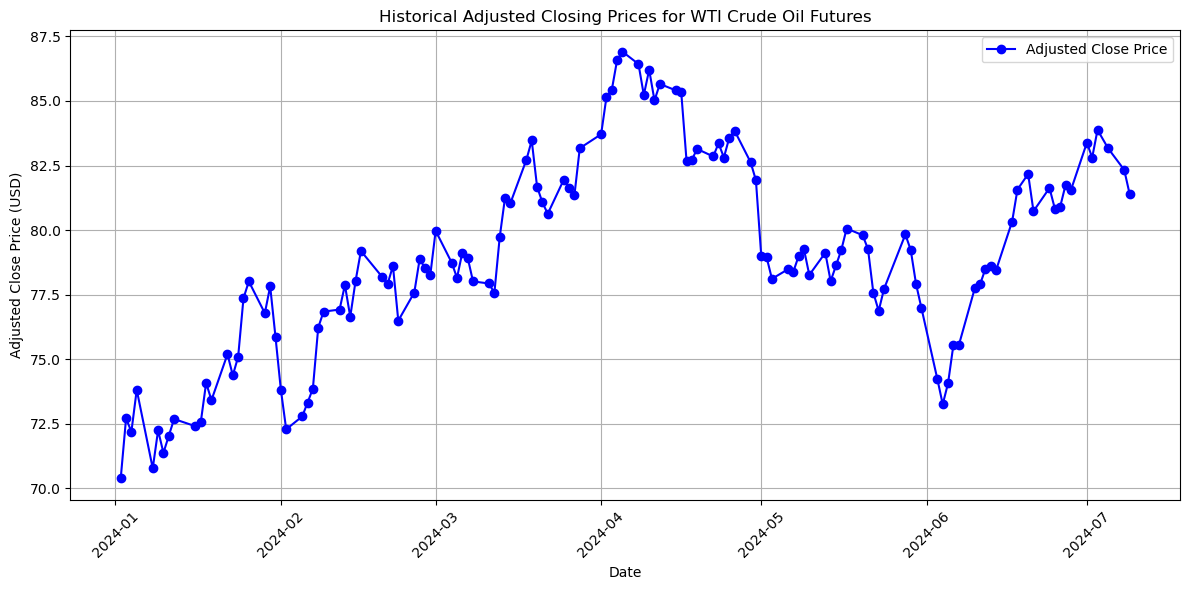

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for crude oil (WTI)
ticker = "CL=F"  # WTI Crude Oil Futures
oil_data = yf.download(ticker, start="2024-01-01", end="2024-07-10")

# Reset the index to make 'Date' a column
oil_data.reset_index(inplace=True)

# Display the first few rows of the data
print(oil_data.head(20))
print(oil_data.info())

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(oil_data['Date'], oil_data['Adj Close'], label='Adjusted Close Price', color='b', marker='o')
plt.title('Historical Adjusted Closing Prices for WTI Crude Oil Futures')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
oil_data.columns



# We need to create more columns of data price data set: 
# Like the differences: between open price and closing price.
# The difference between open price and high price of the day.
# And make sure everything is notmalized 

In [4]:


# Normalize WTI Crude Oil Prices to match the sentiment score range (-1 to 1)
oil_data['Normalized Adj Close'] = (oil_data['Adj Close'] - oil_data['Adj Close'].min()) / (oil_data['Adj Close'].max() - oil_data['Adj Close'].min()) * 2 - 1

# Calculate the difference between 'Open' and 'Close' prices
oil_data['Open_Close_Diff'] = oil_data['Open'] - oil_data['Close']

# Normalize the 'Open_Close_Diff' column
min_diff = oil_data['Open_Close_Diff'].min()
max_diff = oil_data['Open_Close_Diff'].max()
oil_data['Normalized_Open_Close_Diff'] = (oil_data['Open_Close_Diff'] - min_diff) / (max_diff - min_diff)


oil_data['High_Open_Diff'] = oil_data['High'] - oil_data['Open']


min_diff = oil_data['High_Open_Diff'].min()
max_diff = oil_data['High_Open_Diff'].max()
oil_data['Normalized_High_Open_Diff'] = (oil_data['High_Open_Diff'] - min_diff) / (max_diff - min_diff)


oil_data['Low_Open_Diff'] = oil_data['High'] - oil_data['Open']

min_diff = oil_data['Low_Open_Diff'].min()
max_diff = oil_data['Low_Open_Diff'].max()
oil_data['Normalized_Low_Open_Diff'] = (oil_data['Low_Open_Diff'] - min_diff) / (max_diff - min_diff)


min_diff = oil_data['Volume'].min()
max_diff = oil_data['Volume'].max()
oil_data['Normalized_Volume'] = (oil_data['Volume'] - min_diff) / (max_diff - min_diff)


oil_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Normalized Adj Close,Open_Close_Diff,Normalized_Open_Close_Diff,High_Open_Diff,Normalized_High_Open_Diff,Low_Open_Diff,Normalized_Low_Open_Diff,Normalized_Volume
0,2024-01-02,71.709999,73.639999,70.059998,70.379997,70.379997,330992,-1.000000,1.330002,0.723736,1.930000,0.526028,1.930000,0.526028,0.507218
1,2024-01-03,70.500000,73.230003,69.279999,72.699997,72.699997,334861,-0.719298,-2.199997,0.036965,2.730003,0.745207,2.730003,0.745207,0.514938
2,2024-01-04,73.040001,74.000000,71.059998,72.190002,72.190002,344467,-0.781004,0.849998,0.630350,0.959999,0.260274,0.959999,0.260274,0.534107
3,2024-01-05,72.400002,74.239998,72.209999,73.809998,73.809998,325525,-0.584997,-1.409996,0.190662,1.839996,0.501369,1.839996,0.501369,0.496308
4,2024-01-08,73.510002,73.949997,70.129997,70.769997,70.769997,392249,-0.952813,2.740005,0.998056,0.439995,0.117806,0.439995,0.117806,0.629457


In [5]:
# Save the merged DataFrame to a new CSV file
output_path = 'Crude Oil Data/CrudeOil_Finished.csv'
oil_data.to_csv(output_path, index=False)

print(f"The merged DataFrame has been saved to {output_path}")

The merged DataFrame has been saved to Crude Oil Data/CrudeOil_Finished.csv
